# Pymaceuticals Inc.
---

### Analysis
In this study, 249 mice found to have SCC tumors were treated with various drugs. Tumor development was observed and measured over a period of 45 days. The purpose of this study was to compare the performance of Pymaceuticals' target drug, capomulin, to other treatment regimens. 

- The average tumor volume has a strong linear correlation with mouse weight, as weight increases the average tumor volume increases
- Capomulin and Ramicane were found to be the most effective drug treatments
- Capomulin drug treatment has a unquie behavious where, the tumor volume increases first and then drops drastically

In [494]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
research = pd.merge(study_results,mouse_metadata, on = 'Mouse ID')

# Display the data table for preview
research.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [495]:
# Checking the number of mice
print(research['Mouse ID'].nunique())
research.sort_values(['Mouse ID'], ascending = False)
research.head()

249


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [496]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
previous = research.iloc[0,:]
data = []
for i,row in research.iterrows():
    if i==0:
        continue
    elif row['Mouse ID'] == previous['Mouse ID'] and row['Timepoint'] == previous['Timepoint']:
        if row['Mouse ID'] not in data:
            data.append(row['Mouse ID'])
    previous = row
print(data)



['g989']


In [497]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = []
for i,row in research.iterrows():
    if research.iloc[i,0] in data:
        duplicate.append(research.iloc[i,:])
duplicate = pd.DataFrame(duplicate)
duplicate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [498]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata = research.loc[research['Mouse ID']!= data[0]]

In [499]:
# Checking the number of mice in the clean DataFrame.
print(cleandata['Mouse ID'].nunique())

248


## Summary Statistics

In [500]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats = cleandata.groupby('Drug Regimen')
statsum = pd.DataFrame()
statsum['Mean Tumor Volume'] = stats['Tumor Volume (mm3)'].mean()
statsum['Median Tumor Volume'] = stats['Tumor Volume (mm3)'].median()
statsum['Tumor Volume Variance'] = stats['Tumor Volume (mm3)'].var()
statsum['Tumor Volume Std. Dev.'] = stats['Tumor Volume (mm3)'].std()
statsum['Tumor Volume Std. Err.'] = stats['Tumor Volume (mm3)'].sem()
statsum



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [501]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary = stats.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

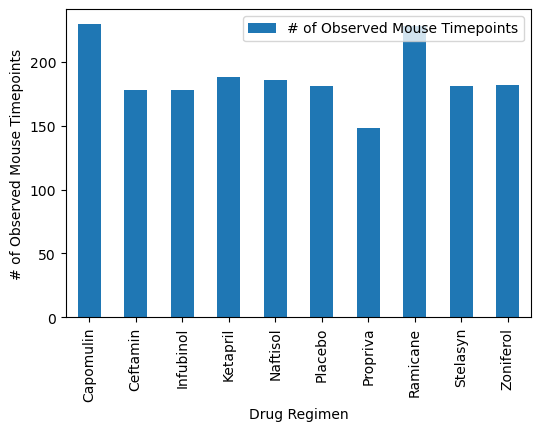

In [502]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_df = pd.DataFrame({'Drug Regimen': cleandata['Drug Regimen'].unique(), 
                        '# of Observed Mouse Timepoints' :cleandata.groupby('Drug Regimen')['Drug Regimen'].count()})
figure1 = plot_df.plot(kind="bar", figsize=(6,4),
                                xlabel='Drug Regimen',
                                ylabel='# of Observed Mouse Timepoints')

# Show plot
figure1


Text(0, 0.5, '# of Observed Mouse Timepoints')

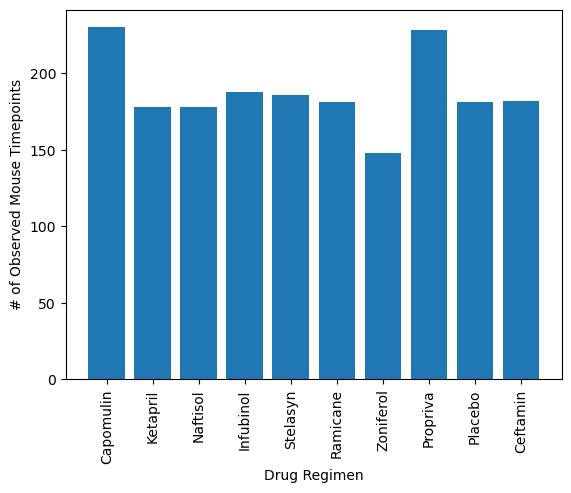

In [503]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
xaxis = cleandata['Drug Regimen'].unique()
yaxis = cleandata.groupby('Drug Regimen')['Drug Regimen'].count()
plt.bar(xaxis,yaxis)
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

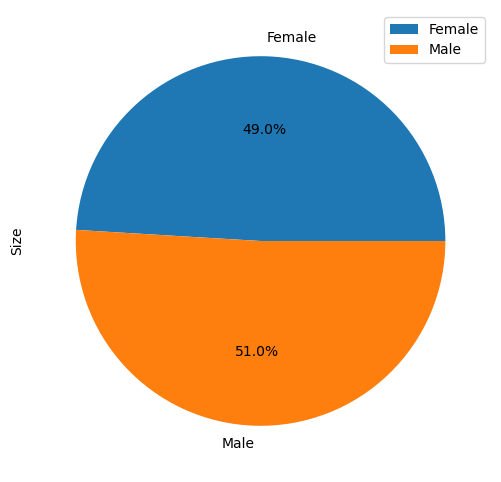

In [504]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Labels = cleandata['Sex'].unique()
Size = cleandata.groupby('Sex')['Mouse ID'].count()/cleandata['Mouse ID'].count()*100
pieplot_df = pd.DataFrame({'Labels': Labels, 'Size' :Size})
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.00005,0.00005)
figure1 = pieplot_df.plot(kind="pie", figsize=(8,6), y = 'Size'
                                ,autopct='%0.1f%%',explode=explode)

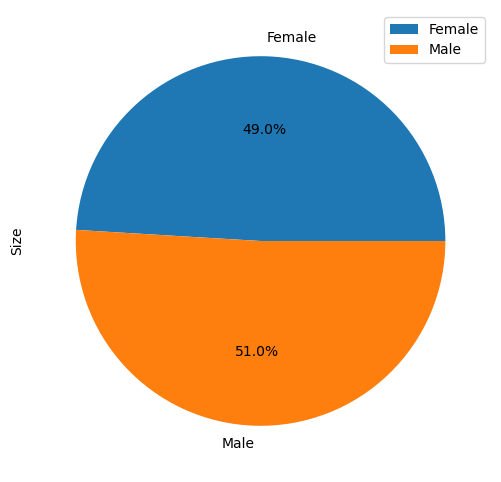

In [505]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Labels = cleandata['Sex'].unique()
Size = cleandata.groupby('Sex')['Mouse ID'].count()/cleandata['Mouse ID'].count()*100
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.00005,0.00005)
plt.figure(figsize=(8, 6))
plt.pie(Size , labels= Labels, autopct='%0.1f%%',explode=explode)
plt.ylabel('Size')
plt.legend()

## Quartiles, Outliers and Boxplots

In [506]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastpoint = cleandata.groupby('Mouse ID')['Timepoint'].max()
lastpoint.head()

df = pd.merge(lastpoint, cleandata, how = 'left', on = ['Mouse ID', 'Timepoint'])
df = df.loc[df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
df = df.rename(columns = {'Timepoint':'Final Timepoint','Tumor Volume (mm3)':'Final Tumor Volume (mm3)'})
df.reset_index(inplace=False)
print(len(df))
df.head()



100


,Mouse ID,Final Timepoint,Final Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [507]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatment = ['Capomulin','Ramicane','Infubinol','Ceftamin']

treatment_vol= pd.DataFrame()
for j in treatment:
    tumor = []
    for i in range(len(df)):
        if df.iloc[i, 4] == j:
            tumor.append(df.iloc[i, 2])

    q1 = np.quantile(tumor,.25)
    q3 = np.quantile(tumor,.75)
    
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    treatment_vol[j] = tumor
    my_dict = {j:tumor}
    dfcond = df.loc[df['Drug Regimen']==j]
    results   = dfcond.loc[(dfcond['Final Tumor Volume (mm3)']> upper_bound)|(dfcond['Final Tumor Volume (mm3)']< lower_bound)]
    cond = results['Final Tumor Volume (mm3)']
    print(f'{j} outlier are: {cond}')



Capomulin outlier are: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Ramicane outlier are: Series([], Name: Final Tumor Volume (mm3), dtype: float64)
Infubinol outlier are: 31    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Ceftamin outlier are: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


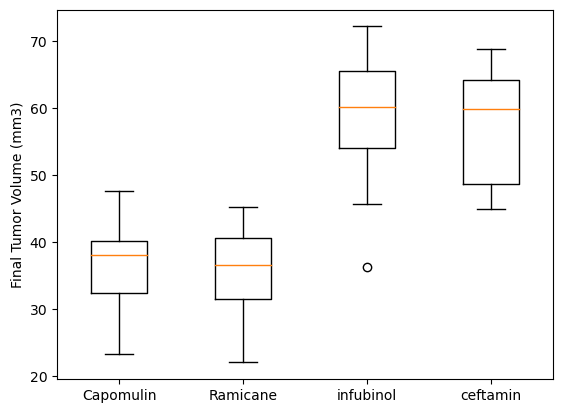

In [508]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

my_dict = {'Capomulin': treatment_vol['Capomulin'], 'Ramicane': treatment_vol['Ramicane'],'infubinol':treatment_vol['Infubinol'],'ceftamin':treatment_vol['Ceftamin']}
plt.boxplot(my_dict.values(), labels=my_dict.keys())
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

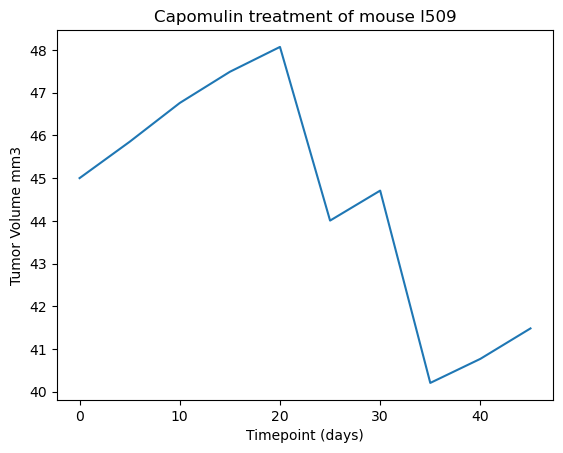

In [509]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x = cleandata['Timepoint'].unique()
y = cleandata.loc[cleandata['Mouse ID'] == 'l509','Tumor Volume (mm3)']
plt.plot(x,y)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume mm3')
plt.title('Capomulin treatment of mouse l509')

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

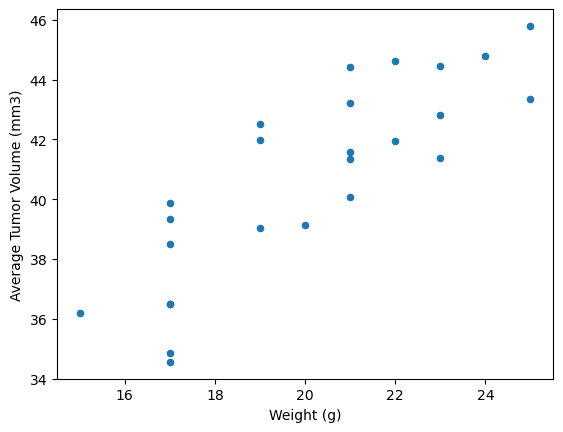

In [510]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = cleandata.loc[cleandata['Drug Regimen']=='Capomulin']
scatter_df = pd.DataFrame()
scatter_df['Tumor Volume']= data.groupby(['Weight (g)','Mouse ID'])['Tumor Volume (mm3)'].mean()
scatter_df.reset_index(inplace=True)
scatter_df.plot.scatter(x = 'Weight (g)',y = 'Tumor Volume', ylabel = 'Average Tumor Volume (mm3)')


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


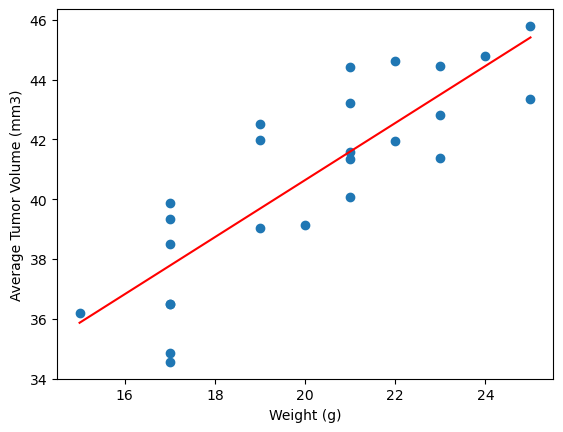

In [511]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = scatter_df['Weight (g)']
y_values = scatter_df['Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The correlation between mouse weight and the average tumor volume is: {round(rvalue,2)}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()